In [205]:
%matplotlib notebook

In [206]:
# Import Dependencies Libraries
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from pylab import rcParams
from pandas import Series

In [207]:
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [208]:
#Read in the China Data CSV to Dataframe
China_data_df = pd.read_csv('../Resources/global.csv')
China_data_df.head()

Index  Global retail e-commerce sales (in billion $US dollars)  Month/Date  \
0      1                                                572        12/31/2010   
1      2                                                680        12/31/2011   
2      3                                                893        12/31/2012   
3      4                                               1088        12/31/2013   
4      5                                               1316        12/31/2014   

   Global GDP (billion $US dollars) Month/Date2  
0                             66110      31-Dec  
1                             68190      31-Dec  
2                             69910      31-Dec  
3                             71770      31-Dec  
4                             73810      31-Dec

In [210]:
China_data_df.dropna(how='any', inplace=True)
China_data_df.head()

pd.options.display.float_format = "{:,.2f}".format
China_data_df.head()

Index  Global retail e-commerce sales (in billion $US dollars)  Month/Date  \
0      1                                                572        12/31/2010   
1      2                                                680        12/31/2011   
2      3                                                893        12/31/2012   
3      4                                               1088        12/31/2013   
4      5                                               1316        12/31/2014   

   Global GDP (billion $US dollars) Month/Date2  
0                             66110      31-Dec  
1                             68190      31-Dec  
2                             69910      31-Dec  
3                             71770      31-Dec  
4                             73810      31-Dec

In [211]:
# Calculate Global retail E-Commerce Sales vs Global GDP growth
China_data_df["Global E-Commerce Share(%)"] = China_data_df.iloc[:, 1] / China_data_df.iloc[:, 3] * 100
China_data_df["Global E-Commerce Share(%)"].head()

0   0.87
1   1.00
2   1.28
3   1.52
4   1.78
Name: Global E-Commerce Share(%), dtype: float64

In [212]:
#Split M/D/Y into Years
China_data_df[["Month", "Day", "Year"]] = China_data_df["Month/Date"].str.split("/", expand=True)  
China_data_df.head()

Index  Global retail e-commerce sales (in billion $US dollars)  Month/Date  \
0      1                                                572        12/31/2010   
1      2                                                680        12/31/2011   
2      3                                                893        12/31/2012   
3      4                                               1088        12/31/2013   
4      5                                               1316        12/31/2014   

   Global GDP (billion $US dollars) Month/Date2  Global E-Commerce Share(%)  \
0                             66110      31-Dec                        0.87   
1                             68190      31-Dec                        1.00   
2                             69910      31-Dec                        1.28   
3                             71770      31-Dec                        1.52   
4                             73810      31-Dec                        1.78   

  Month Day  Year  
0    12  31  2010  
1    12  31  2011  
2    12  31  2012  
3    12  31  2013  
4    12  31  2014

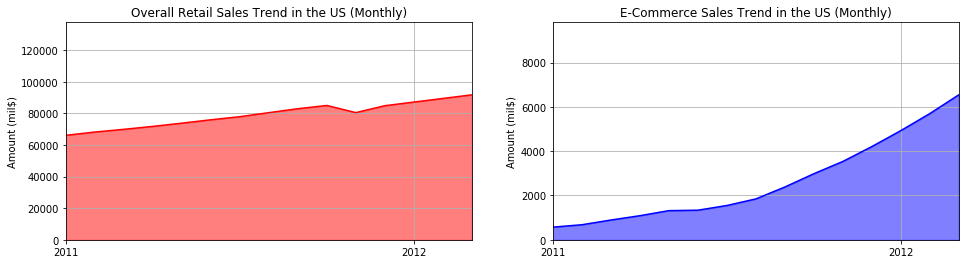

In [213]:

# Plot retail and e-commerce sales line charts for 10 years
x_axis = China_data_df.loc[:, "Month/Date"]
x_label = list(China_data_df.loc[:, "Year"].unique())
x_label.insert(2010, 2030)

y_axis_r = China_data_df.loc[:, "Global GDP (billion $US dollars)"]
y_axis_e = China_data_df.loc[:, "Global retail e-commerce sales (in billion $US dollars)"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(x_axis, y_axis_r, color = "r")
ax1.set_title("Overall Retail Sales Trend in the US (Monthly)")
ax1.set_ylabel("Amount (mil$)")
ax1.set_xlim(x_axis.head(1), x_axis.tail(1))
ax1.set_ylim(0, y_axis_r.max()*1.5)
ax1.grid()
ax1.fill_between(x_axis, y_axis_r, color = "r", alpha = 0.5)
ax1.set_xticks(x_axis)

ax1.xaxis.set_major_locator(MultipleLocator(12))
ax1.set_xticklabels(x_label, minor = False)

ax2.plot(x_axis, y_axis_e, color = "b")
ax2.set_title("E-Commerce Sales Trend in the US (Monthly)")
ax2.set_ylabel("Amount (mil$)")
ax2.set_xlim(x_axis.head(1), x_axis.tail(1))
ax2.set_ylim(0, y_axis_e.max()*1.5)
ax2.grid()
ax2.fill_between(x_axis, y_axis_e, color = "b", alpha = 0.5)
ax2.xaxis.set_major_locator(MultipleLocator(12))
ax2.set_xticklabels(x_label, minor = False)
plt.show()

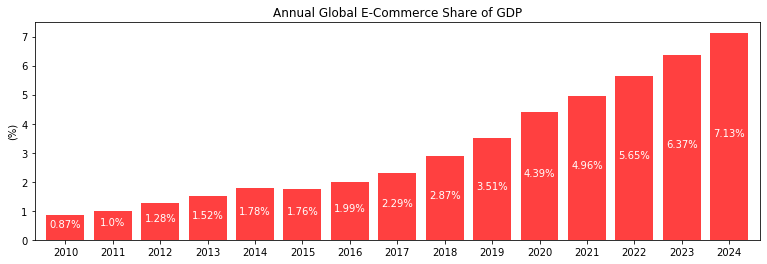

In [216]:
ax = China_data_df.iloc[:, 5].plot(kind = "bar", width = 0.8, figsize=(13,4), color = "r", alpha = 0.75)
x_label = China_data_df.iloc[:, 8]

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(height, 2))+"%", (left+width/2, height/2), ha='center', color = "white")

plt.title("Annual Global E-Commerce Share of GDP")
plt.ylabel("(%)")
ax.set_xticklabels(x_label, rotation = 0)
plt.savefig('Annual Global E-Commerce Share of GDP')
plt.show()

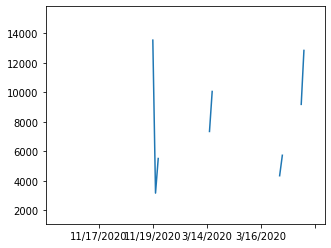

In [12]:
China_data_df2 = China_data_df.sample(n=100, random_state=100, axis=0)
plt.xlabel=('Date')
plt.ylabel=('Online Retail Sales Accumulated($US)')

plt.title=('China Ecommerce Trends')
China_data_df2['Online Retail Sales Accumulated($US)'].plot()

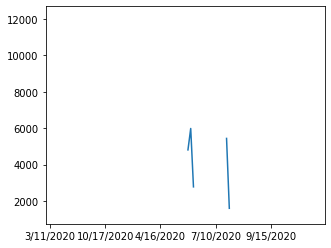

In [13]:
China_data_df3 = China_data_df.sample(n=100, random_state=120, axis=0)
plt.xlabel=('Date')
plt.ylabel=('Online Retail Sales in Goods Accumulated($US)')

plt.title=('China Ecommerce Trends')
China_data_df3['Online Retail Sales in Goods Accumulated($US)'].plot()

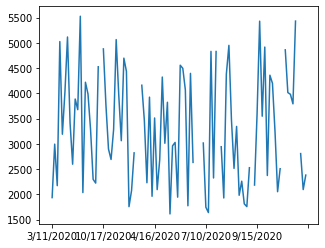

In [14]:
China_data_df4 = China_data_df.sample(n=100, random_state=120, axis=0)
plt.xlabel=('Date')
plt.ylabel=('Total Retail Sales of Consumer Goods Current Period($US)')

plt.title=('China Ecommerce Trends')
China_data_df3['Total Retail Sales of Consumer Goods Current Period($US)'].plot()

In [27]:
China_data_df.index

DatetimeIndex(['2020-06-20', '2020-05-20', '2020-04-20', '2020-03-20',
               '2020-02-20', '2020-12-19', '2020-11-19', '2020-10-19',
               '2020-09-19', '2020-08-19',
               ...
               '2020-10-10', '2020-09-10', '2020-08-10', '2020-07-10',
               '2020-06-10', '2020-05-10', '2020-04-10', '2020-03-10',
               '2020-02-10', '2020-01-10'],
              dtype='datetime64[ns]', name='Date', length=117, freq=None)

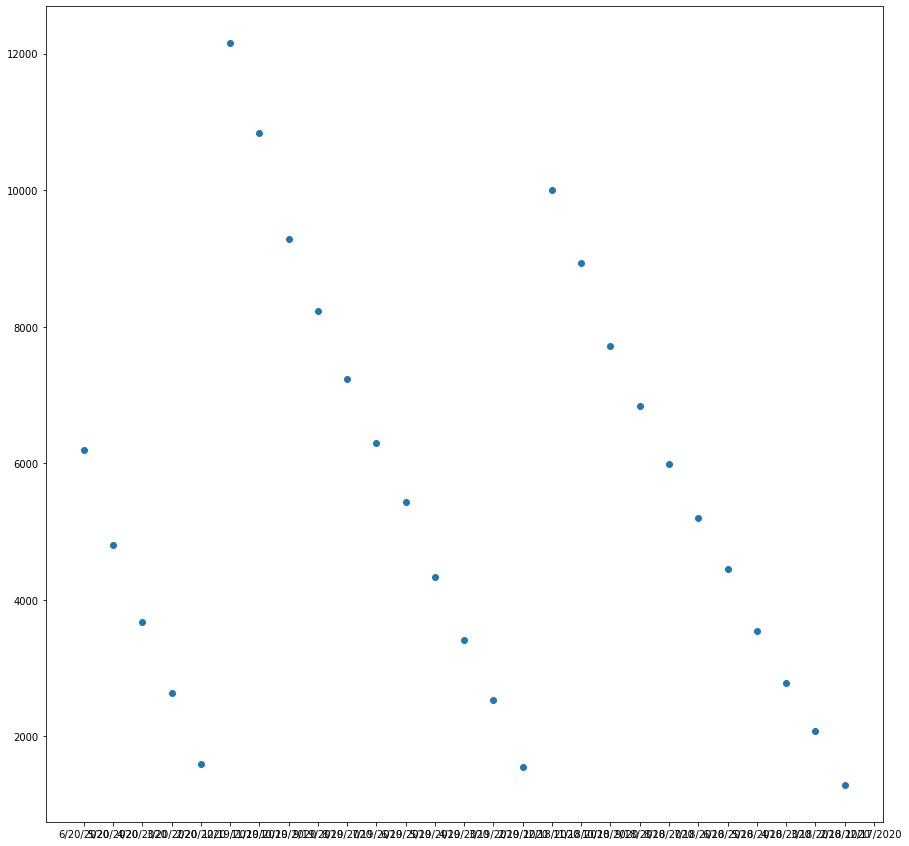

In [15]:
#plot figure
fig, ax = plt.subplots(figsize=(15,15))

#Add x-axis and y-axis
ax.scatter(China_data_df.index.values, China_data_df['Online Retail Sales in Goods Accumulated($US)'])

In [ ]:
#Convert China Monthly Data into Annual Data using bin groups 
# Create the bins in which Data will be held
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# Create the names for the five bins
China_Annual_Data = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
#China_Annual_Data

China_data_df_mo["Annual Data Summary"] = pd.cut(China_data_df_mo["Binning group#"], bins, labels=China_Annual_Data)
China_data_df_mo

In [ ]:
#Group German Date into Annual format to merge with China file on Date
# Create the bins in which Data will be held
bins = [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

# Create the names for the  bins
German_annual_data = ["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"]
German_annual_data

German_results_df["Annual Data Summary"] = pd.cut(German_results_df["Bin Group#"], bins, labels=German_annual_data)
#German_results_df

# Creating a group based off of the bins
df2= German_results_df.groupby("Annual Data Summary")
df2.max()

In [ ]:
#Merge 2 files on Annual Data Summary field for summary stats and graphing/plotting
df['Annual Data Summary'].value_counts()
df2['Annual Data Summary'].value_counts()
df = pd.concat([df2], axis=1) merge(`df2`)